In [1]:
import sys,os
sys.path.append(os.getcwd())

from clarifier_plots import ClarifierPlot
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
data = load_breast_cancer()
X, y, feature_names = data.data, data.target, data.feature_names
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

c_plt = ClarifierPlot(model=clf, examples=X_train, targets=y_train, feature_names=feature_names)

<function average_precision_score at 0x118957280>
Using 1 of processors to compute importance...
Starting on the important variable 0 out of 3...
Starting on the important variable 1 out of 3...
Starting on the important variable 2 out of 3...


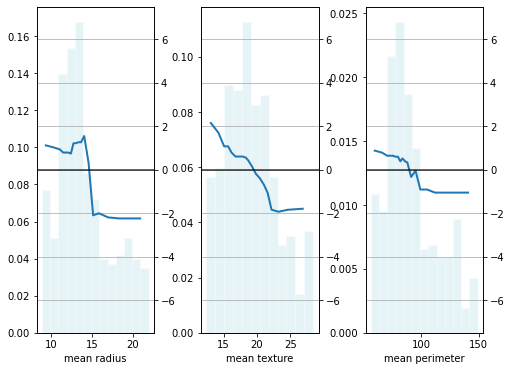

In [4]:
results = c_plt.permutation_importance(n_multipass_vars=3)
important_vars = list(results.retrieve_multipass().keys())
fig, axes = c_plt.plot_ale(important_vars)

In [5]:
import matplotlib.pyplot as plt

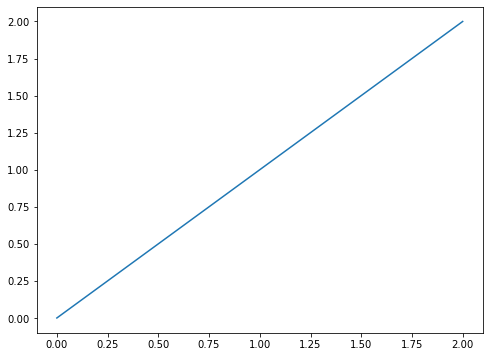

In [8]:
plt.figure(figsize=(8,6))
plt.plot([0,1,2],[0,1,2])